In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files
uploaded = files.upload()

Saving roommate_data_updated (1).csv to roommate_data_updated (1).csv


In [ ]:
filename = list(uploaded.keys())[0]   # get uploaded filename

In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded[filename]))
df.head(20)



,Unnamed: 0,user_id,name,sex,budget,location_pref,commute_pref,How often are you willing to clean the common area?,Do you clean your dishes right after using them?,study_hours,Does noise bother you?,"If at night from what time. Noise, if night what time",Would you invite people to your flat?,cluster,cleanliness,Dishes,Noise Tolerance
0,0,1,Sarah,Female,1100,Near Campus,3,Few days per week,Yes,3,At night,10pm,Yes,2,4,1,3
1,1,2,Mike,Male,1400,Downtown LA,2,Every day,Yes,5,At night,11pm,No,1,5,1,4
2,2,3,Emma,Female,1500,Suburb,4,Few days per week,No,2,During the day,NaN,Yes,0,4,0,1
3,3,4,James,Male,800,Near Campus,1,1 day per week,Yes,4,At night,Midnight,No,2,3,1,0
4,4,5,Olivia,Female,1200,Bay Area,3,Few days per week,No,3,At night,Midnight,Yes,0,4,0,0
5,5,6,Lucas,Male,900,Downtown LA,2,Every day,Yes,5,During the day,NaN,No,1,5,1,1
6,6,7,Sophia,Female,1300,Suburb,5,Few days per week,No,1,At night,9pm,Yes,0,4,0,2
7,7,8,Ethan,Male,1000,Near Campus,1,Few days per week,Yes,4,At night,9pm,No,2,4,1,2


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'user_id', 'name', 'sex', 'budget', 'location_pref',
       'commute_pref', 'How often are you willing to clean the common area?',
       'Do you clean your dishes right after using them?', 'study_hours',
       'Does noise bother you?',
       'If at night from what time. Noise, if night what time',
       'Would you invite people to your flat?', 'cluster', 'cleanliness',
       'Dishes', 'Noise Tolerance'],
      dtype='object')


In [ ]:
# 1. Inspect your data
print(df.head())
print(df.info())


   Unnamed: 0  user_id    name     sex  budget location_pref  commute_pref  \
0           0        1   Sarah  Female    1100   Near Campus             3   
1           1        2    Mike    Male    1400   Downtown LA             2   
2           2        3    Emma  Female    1500        Suburb             4   
3           3        4   James    Male     800   Near Campus             1   
4           4        5  Olivia  Female    1200      Bay Area             3   

  How often are you willing to clean the common area?  \
0                                  Few days per week    
1                                          Every day    
2                                  Few days per week    
3                                     1 day per week    
4                                  Few days per week    

  Do you clean your dishes right after using them?  study_hours  \
0                                              Yes            3   
1                                              Yes    

In [ ]:
features = ['name', 'sex','budget', 'location_pref', 'commute_pref', 'How often are you willing to clean the common area?', 'Do you clean your dishes right after using them?', 'study_hours','Does noise bother you?','If at night from what time. Noise, if night what time','Would you invite people to your flat?']
X = df[features].copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# separate categorical and numeric
categorical = df.select_dtypes(include=["object"]).columns
numeric = df.select_dtypes(exclude=["object"]).columns

In [ ]:
df_encoded = pd.get_dummies(df[categorical], drop_first = True)

In [ ]:
X= pd.concat([df[numeric], df_encoded], axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
#Elbow Method
sse = []
for k in range(1,X_scaled.shape[0] + 1):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_scaled)
  sse.append(km.inertia_)

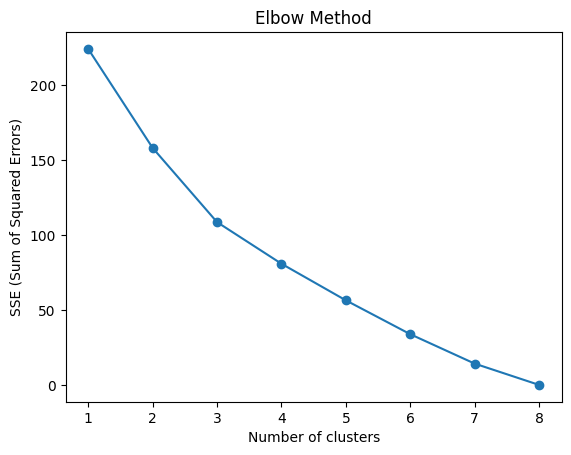

In [ ]:
# Plot elbow curve
max_clusters = min(10, X_scaled.shape[0])
plt.plot(range(1, max_clusters + 1),sse[:max_clusters], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# compute cosine similarity matrix
similarity_matrix = cosine_similarity(X_scaled)

In [ ]:
# example: similarity of first roommate with all others
# roommate_index = 0
# similarities = similarity_matrix[roommate_index]
# ranked_matches = np.argsort(similarities)[::-1] # descending order
# print("Top matches for roommate 0:", ranked_matches[1:6])

In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
def transform_roommate_data(df):
  df['cleanliness'] = df['How often are you willing to clean the common area?'].apply(
        lambda x: 5 if x == 'Every day' else (
            4 if x == 'Few days per week' else (
                3 if x == '1 day per week' else 0
            )
        )
    )
  df['Dishes'] = df['Do you clean your dishes right after using them?'].apply(lambda x: 1 if x == 'Yes' else 0)
  def noise_score(row):
    if row['Does noise bother you?'] == 'During the day':
        return 1
    elif row['Does noise bother you?'] == 'At night':
        time = row['If at night from what time. Noise, if night what time']
        return {'9pm': 2, '10pm': 3, '11pm': 4, 'midnight': 5, 'after midnight': 6}.get(time, 0)
    else:
        return 0
  df['Noise Tolerance'] = df.apply(noise_score, axis=1)
  df['commute_pref'] = df['commute_pref'].apply(lambda x: 5 if x == 'Very Important' else (
            4 if x == 'Important' else (3 if x == 'Moderate' else (2 if x == 'Not Very Important' else(1 if x == 'Don\'t Care' else 0)))))
  return df


In [ ]:
df = transform_roommate_data(df)
print(df.columns)

Index(['Unnamed: 0', 'user_id', 'name', 'sex', 'budget', 'location_pref',
       'commute_pref', 'How often are you willing to clean the common area?',
       'Do you clean your dishes right after using them?', 'study_hours',
       'Does noise bother you?',
       'If at night from what time. Noise, if night what time',
       'Would you invite people to your flat?', 'cluster', 'cleanliness',
       'Dishes', 'Noise Tolerance'],
      dtype='object')


In [ ]:
print(df.shape)
print(df.columns.tolist())


(8, 15)
['name', 'sex', 'budget', 'location_pref', 'commute_pref', 'How often are you willing to clean the common area?', 'Do you clean your dishes right after using them?', 'study_hours', 'Does noise bother you?', 'If at night from what time. Noise, if night what time', 'Would you invite people to your flat?', 'cluster', 'cleanliness', 'Dishes', 'Noise Tolerance']


In [ ]:
df = pd.read_csv("roommate_data_updated (1).csv")
df = df.drop(columns=['Unnamed: 0'])
df = df.reset_index(drop=True)

In [ ]:
def find_top_matches(df, X_scaled, similarity_matrix, index, top_n = 3):
    """
    Find top matching roommates based on cluster and similarity with readable descriptions
    """
    cluster_id = df.loc[index]['cluster']
    cluster_members = df[df['cluster'] == cluster_id].index.tolist()

    if index in cluster_members:
      cluster_members.remove(index)

    #Get similarities for this user
    similarities = similarity_matrix[index]

    #Filter to only cluster members
    cluster_similarities = [(i, similarities[i]) for i in cluster_members]

     # Sort by highest similarity
    top_matches = sorted(cluster_similarities, key=lambda x: x[1], reverse=True)[:top_n]

    # Return readable results
    results = ({'User': df.iloc[index]['name'],'Top_Matches' : [(df.iloc[k]['name'],  round(score, 3)) for k, score in top_matches]})

    return results
results = find_top_matches(df, X_scaled, similarity_matrix, index=0, top_n=3)
import pandas as pd
pd.DataFrame([results])

,User,Top_Matches
0,Sarah,"[(James, 0.013), (Ethan, -0.096)]"
